In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
import cv2
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [13]:
train_data_path = r'D:\Human_Action_Recognition\data_human_actions\train'
test_data_path = r'D:\Human_Action_Recognition\data_human_actions\test'

In [14]:
def level_name(data_dir):
    output = {}
    class_name = os.listdir(data_dir)
    for level, class_name in enumerate(class_name):
        output[class_name] = level
    return output
train_level = level_name(train_data_path)
test_level = level_name(test_data_path)
print(train_level)
print(test_level)

{'calling': 0, 'drinking': 1, 'eating': 2, 'sitting': 3, 'using_laptop': 4}
{'calling': 0, 'drinking': 1, 'eating': 2, 'sitting': 3, 'using_laptop': 4}


In [15]:
def load_images(data_dir,img_size=(32,32)):
    output = {}
    X = []
    y = []
    class_name = os.listdir(data_dir)
    for level, class_name in enumerate(class_name):
        class_path = os.path.join(data_dir,class_name)
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path,img_name)
            
            img = plt.imread(img_path)
            
            if img is None:
                continue
            
            img = cv2.resize(img,img_size)
            
            X.append(img)
            y.append(level)
    img_array = np.array(X)
    level_array = np.array(y)
    level_name = os.listdir(data_dir)
    
    output['img'] = img_array
    output['level'] = level_array
    output['level_name'] = level_name
    
    return output

In [16]:
train_data = load_images(train_data_path)
train_data

{'img': array([[[[198,  77,   7],
          [189,  88,  10],
          [217,  79,   4],
          ...,
          [ 83,  80,  39],
          [109, 111,  40],
          [111, 109,  52]],
 
         [[226,  98,   8],
          [218,  84,   8],
          [221,  83,   8],
          ...,
          [115, 113,  61],
          [108, 107,  50],
          [120, 120,  58]],
 
         [[230,  93,   2],
          [218,  79,   4],
          [220,  82,   7],
          ...,
          [116, 114,  66],
          [109, 108,  51],
          [118, 120,  58]],
 
         ...,
 
         [[155, 140,  75],
          [ 98,  78,  38],
          [ 95,  75,  38],
          ...,
          [ 79,  80,  40],
          [ 63,  65,  33],
          [ 69,  77,  40]],
 
         [[146, 133,  72],
          [ 96,  76,  37],
          [ 99,  74,  33],
          ...,
          [ 67,  69,  32],
          [ 62,  66,  35],
          [ 72,  78,  44]],
 
         [[122, 112,  53],
          [ 98,  78,  35],
          [ 99,  74,  3

In [17]:
test_data = load_images(test_data_path)
test_data

{'img': array([[[[254, 253, 252],
          [233, 211, 212],
          [199, 170, 156],
          ...,
          [121,  75,  51],
          [107,  61,  35],
          [102,  56,  30]],
 
         [[255, 253, 252],
          [233, 211, 213],
          [200, 171, 157],
          ...,
          [126,  76,  49],
          [111,  65,  39],
          [105,  59,  33]],
 
         [[254, 252, 251],
          [223, 201, 202],
          [196, 167, 153],
          ...,
          [127,  76,  47],
          [113,  67,  41],
          [107,  61,  34]],
 
         ...,
 
         [[ 84,  37,  10],
          [ 86,  39,  12],
          [ 76,  43,  26],
          ...,
          [127,  74,  34],
          [118,  66,  29],
          [116,  64,  27]],
 
         [[ 95,  45,  10],
          [ 94,  44,   9],
          [ 92,  53,  30],
          ...,
          [124,  70,  32],
          [115,  62,  28],
          [114,  61,  27]],
 
         [[104,  50,  13],
          [115,  56,  14],
          [119,  58,  2

In [18]:
X_train, y_train = train_data['img'], train_data['level']
X_test, y_test = test_data['img'], test_data['level']

In [19]:
print(f"Shape of training data: {X_train.shape} images")
print(f"Shape of training labels: {y_train.shape} labels")
print(f"Shape of testing data: {X_test.shape} images")
print(f"Shape of testing labels: {y_test.shape} labels")

Shape of training data: (3570, 32, 32, 3) images
Shape of training labels: (3570,) labels
Shape of testing data: (630, 32, 32, 3) images
Shape of testing labels: (630,) labels


In [20]:
def show_image(data_dir,start_number_of_image,end_number_of_image):
    count = 1
    level_name = os.listdir(data_dir)
    plt.figure(figsize=(15,15))
    for name in level_name:
        class_path = os.path.join(data_dir,name)
        img_name = os.listdir(class_path)
        for i,img_name_ in enumerate(img_name[start_number_of_image:end_number_of_image]):
            img_name_path = (os.path.join(class_path,img_name_))
            
            img_array = plt.imread(img_name_path)
            if img_array is None:
                continue
            
            img_array = cv2.resize(img_array,(224,224))
            plt.subplot(5,end_number_of_image-start_number_of_image,count)
            count = count+1
            plt.title(name)
            plt.imshow(img_array)
    plt.tight_layout(h_pad=2)
    plt.show()

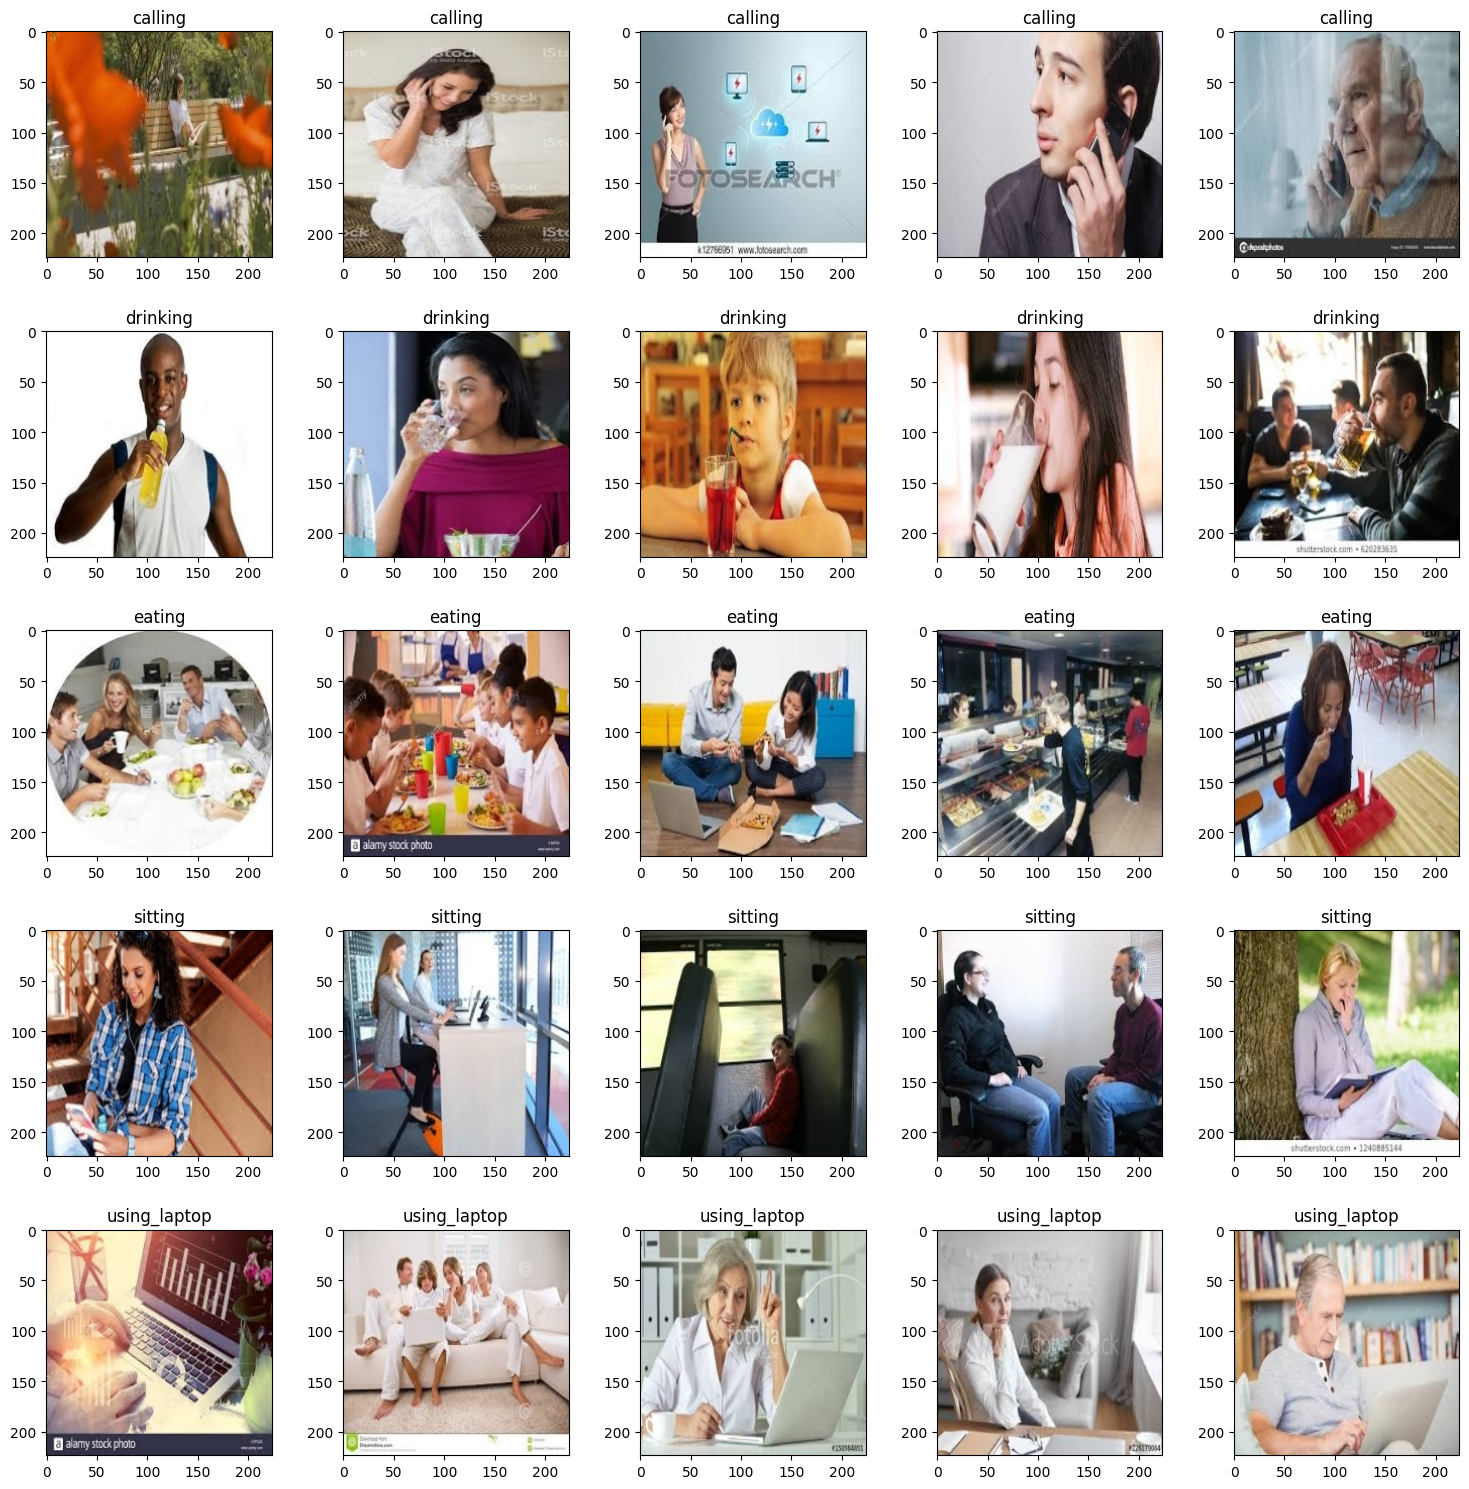

In [21]:
show_image(train_data_path,0,5)

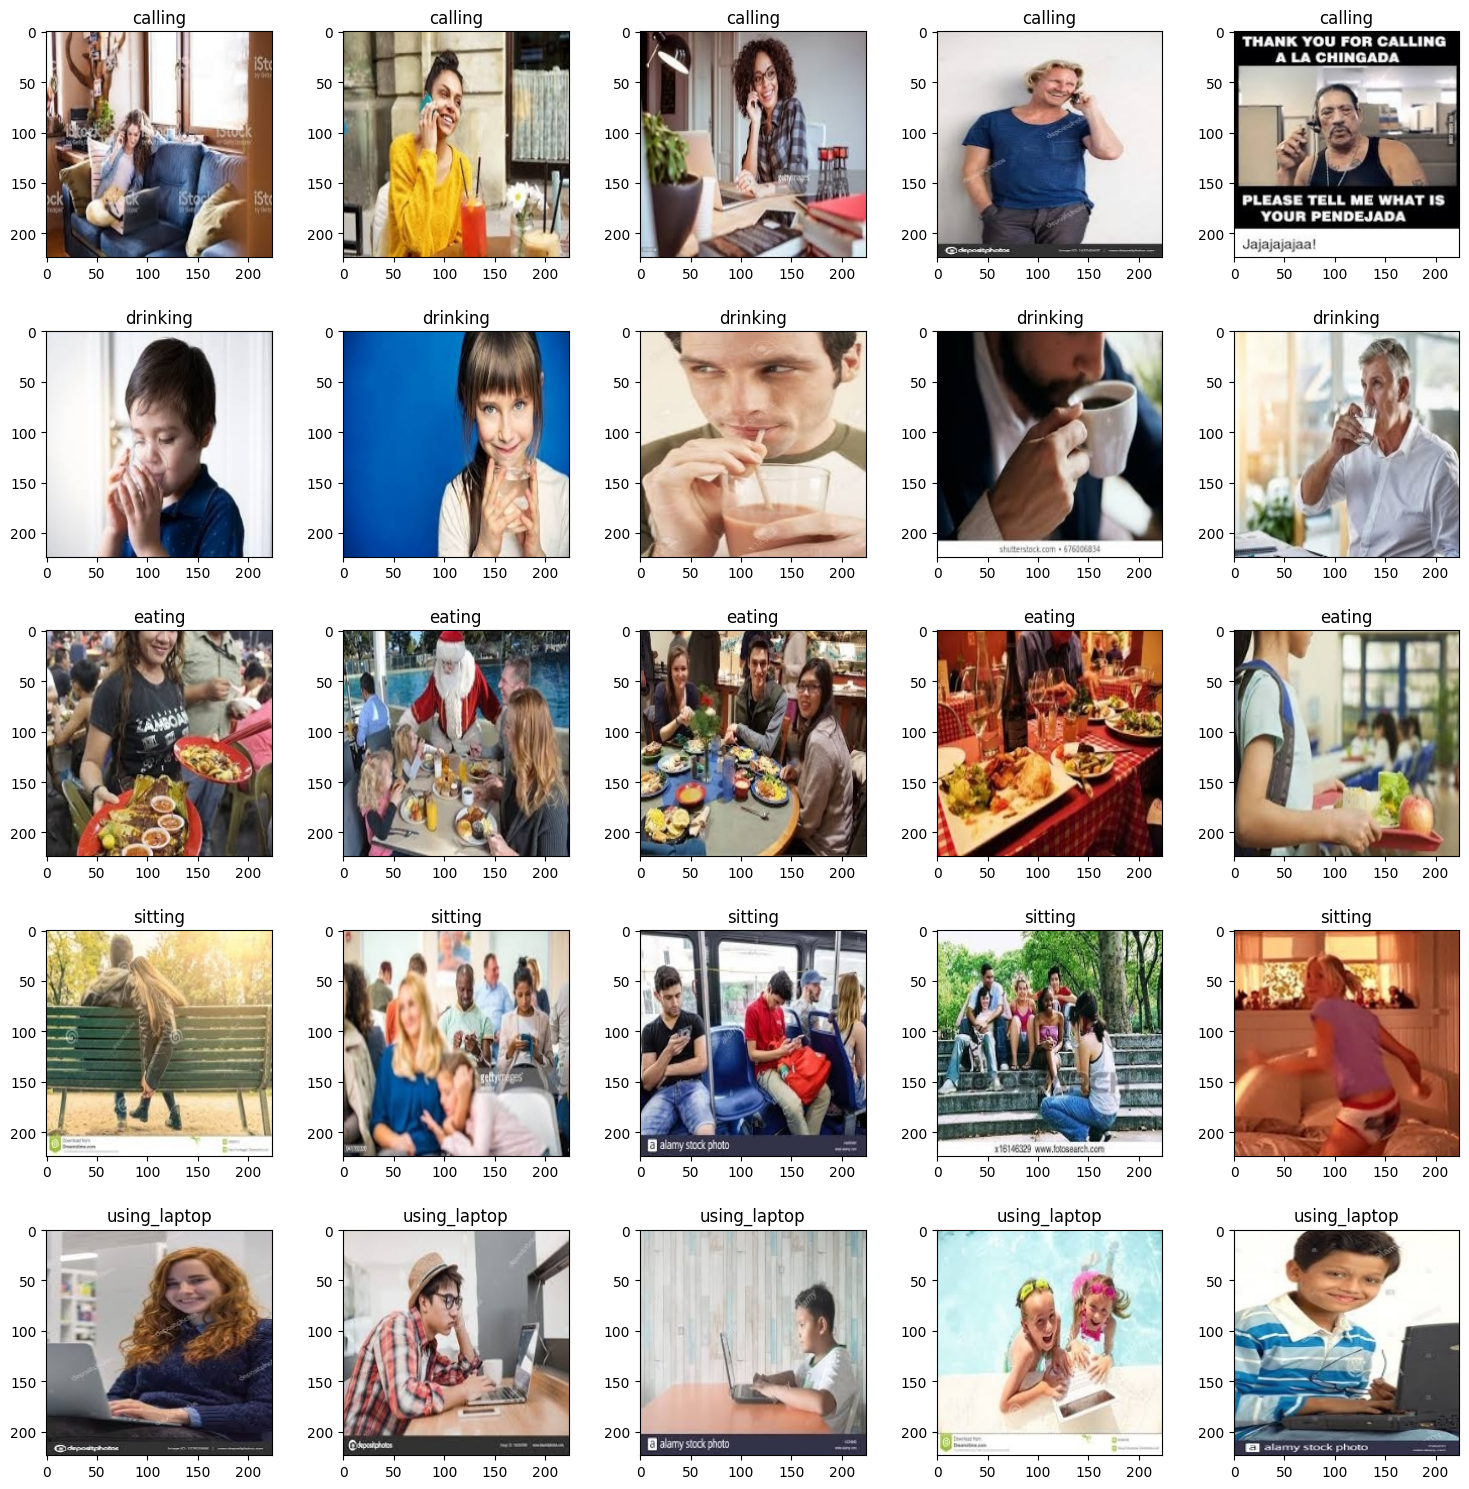

In [22]:
show_image(test_data_path,0,5)

In [23]:
X_train = X_train.astype('float16') / 255.0
X_test = X_test.astype('float16') / 255.0